In [72]:
%matplotlib inline

In [73]:
from transformers import GPT2TokenizerFast
import matplotlib.pyplot as plt
import re

In [74]:
from typing import List, Tuple 

In [75]:
def get_lens_indxs(lst: List[str]) -> Tuple[List[str],List[str]]:
    tmp = sorted([(len(el), i) for i, el in enumerate(lst)], reverse=True)
    return list(zip(*tmp))

In [76]:
src_path = 'data/questions.txt'

In [77]:
with open(src_path, 'r') as f:
    questions_lst = [el.strip('\n').strip() for el in f.readlines() if el != '\n']
len(questions_lst)

335444

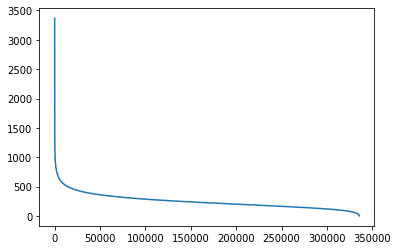

7693 ---
7698 ---
7705 ---
7706 ---
7712 ---
7720 ---
7721 ---
7741 ---
7745 ---
7749 ---
7756 ---
7772 ---
7779 ---
8876 ---
24141 ---
24151 ---
24155 ---
24494 ---
30366 ---
30367 ---
30368 ---
30369 ---
30370 ---
30371 ---
38056 ---
43867 ---
49041 ---
56306 ---
56307 ---
58061 ---
58071 ---
79188 ---
85531 ---
86302 ---
88143 ???
89017 ???
89018 ???
91871 ---
91875 ---
91876 ---
91902 ---
109142 ---
116692 ???
116693 ???
121426 ---
130530 ---
132635 ---
132636 ---
134464 ---
143158 ---
148104 ---
148390 ---
151131 ---
160204 ---
164683 ---
178839 ---
187842 ---
187859 ---
187864 ---
187866 ---
187868 ---
187870 ---
187873 ---
187879 ---
187883 ---
187889 ---
187891 ---
187897 ---
187900 ---
187933 ---
192269 ---
210123 ???
210125 ???
227329 ---
254480 ---
259263 ---
272055 ???
272057 ???
288829 ---
288830 ---
288832 ---
288838 ---
288841 ---
288847 ---
288854 ---
288863 ---
288877 ---
288882 ---
288895 ---
288913 ---
303269 ---
303270 ---
303298 ---
303299 ---
303303 ---
303304 ---

In [10]:
lens, indxs = get_lens_indxs(questions_lst)
plt.plot(lens)
plt.show()

for i in indxs[::-1]:
    if questions_lst[i]:
        print(i, questions_lst[i])
    if len(questions_lst[i]) > 20:
        break

In [79]:
f_q_lst = [el for el in questions_lst if re.search(r'неоценимую помощь оказали', el)]
f_q_lst

['На одном изображении Сталин наступает сапогом на третью букву английского прилагательного, хотя с тем же успехом мог бы наступить и на четвертую. Что это за прилагательное? !!При подготовке тура неоценимую помощь оказали: Яна Азриэль (Хайфа), Владимир Городецкий (Иерусалим), Александр Губин (Челябинск), Виктор Дзекановский (Санкт-Петербург), Александр Зайцев (Пермь - Москва), Ирина Зубкова (Нижний Новгород), Андрей Кокуленко (Омск), Константин Костенко (Гремячинск - Пермь), Вадим Кузмич (Логойск), Константин Малютин (Новосибирск), Мишель Матвеев (Санкт-Петербург), Владимир Машковцев (Пермь - Москва), Ростислав Миневич (Мозырь), Дмитрий Овчарук (Киев), Геннадий Окулов (Пермь), Вадим Опутин (Пермь), Анна Охапкина (Ижевск - Москва), Глеб Русских (Ижевск), Аркадий Рух (Минск), Валерий Семёнов (Минск), Дмитрий Слоущ (Бат-Ям), Виктор Смирнов (Москва), Никита Смирнов (Сыктывкар), Алена Тарасова (Лондон), Александр Тобенгауз (Москва), Артемий Хомутов (Калининград), команда "Верный вомбат" (П

In [11]:
stop_words = [r'\xa0\xa0\xa0\xa0','!!', 'благодарит',
              'благодарят', 'авторский турнир', 'Редакторская группа', 'Вопросы написаны по книгам',
              'неоценимую помощь оказали',
             ]
regexp = f'({"|".join(stop_words)})'
print(regexp)
tmp = []
for el in questions_lst:
    filtered_el = []
    for el_j in el.split('.'):
        if re.search(regexp, el_j):
            break
        filtered_el.append(el_j)
    if len(filtered_el) > 1:
        el = '.'.join(filtered_el)
        tmp.append(el)
questions_lst = tmp.copy()

(\xa0\xa0\xa0\xa0|!!|благодарит|благодарят|авторский турнир|Редакторская группа|Вопросы написаны по книгам|неоценимую помощь оказали)


In [12]:
lens, indxs = get_lens_indxs(questions_lst)

for i in indxs[::-1]:
    if questions_lst[i]:
        print(i, questions_lst[i])
    if len(questions_lst[i]) > 30:
        break

24879 ..
38958 ..
46420 ..
55244 ..
58249 ..
70645 ..
77541 ..
128877 ..
153318 ..
160092 ..
163527 ..
171520 ..
181619 ..
206220 ..
216402 ..
217499 ..
222948 ..
231892 ..
241629 ..
252803 ..
254395 ..
270511 ..
3071 А.С
4554 [..
6024 С.А
9225 Д.М
11098 [..
17381 А..
19709 [..
19710 [..
21417 И.О
21517 [..
21518 [..
24887 [..
27304 [..
32993 А.С
35590 Ф.Г
39920 [..
41256 "..
41872 [..
43453 [..
47129 П.С
47588 "..
48377 [..
52088 [..
52090 [..
53939 [..
55978 А.С
58244 [..
58245 [..
58246 [..
58248 [..
59929 А.С
72322 М.Ж
72803 М.М
72921 [..
72922 [..
72923 [..
78881 В.В
79323 [..
79918 [..
80873 [..
81377 [..
83039 А.С
85568 [..
86608 А.П
89321 [..
89322 [..
92370 А.С
92669 Б.Т
92670 О.Г
92671 А.Б
92990 В.А
94409 "..
95023 [..
97929 "..
98355 [..
99688 А.С
103997 [..
103998 [..
104531 Я..
105597 Б.Б
105598 Ф.Ф
106071 [..
107005 [..
107007 [..
107135 [..
108938 [..
108941 [..
117160 М.В
117235 А.С
129378 "..
134050 [..
137346 [..
141358 [..
149787 С.П
149965 [..
149966 [..
149967 [..


In [13]:
questions_lst = [questions_lst[indx] for i, indx in enumerate(indxs) if lens[i] > 30]

In [14]:
stop_words = [r'\[Ведущему:', r'аздаточный материал',]
regexp = f'({"|".join(stop_words)})'
regexp

'(\\[Ведущему:|аздаточный материал)'

In [15]:
f_q_lst = [el for el in questions_lst if not re.search(regexp, el)]
len(f_q_lst)

274163

In [16]:
# f_q_lst

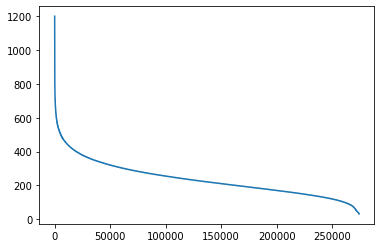

In [17]:
lens, indxs = get_lens_indxs(f_q_lst)
plt.plot(lens)

In [18]:
with open('data/questions_filtered.txt', 'w') as f:
    f.writelines(map(lambda x: x+'\n', questions_lst))

In [67]:
with open('data/questions_filtered.txt', 'r') as f:
    questions_lst = f.readlines()
len(questions_lst)

274598

In [68]:
tokenizer = GPT2TokenizerFast.from_pretrained("sberbank-ai/rugpt3small_based_on_gpt2")
tokenizer.pad_token = "<pad>"

Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.


In [69]:
tokens_lens = sorted([(len(tokenizer(el)['input_ids']), i) for el in questions_lst], reverse=True)

In [70]:
t_lens, t_indxs = list(zip(*tokens_lens))

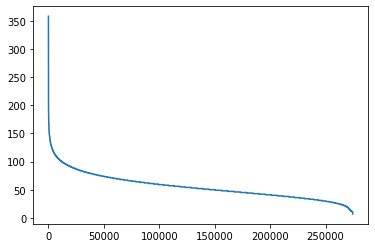

In [71]:
plt.plot(t_lens)